In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
test_data = pd.read_csv('/Users/baconbaker/Documents/Studium/ANM/anm-project/data/test_data/esb.csv')
train_data = pd.read_csv('/Users/baconbaker/Documents/Studium/ANM/anm-project/data/train_data/esb.csv')

train_data = one_hot(train_data)

In [10]:
def one_hot(df):
    df['start_time'] = pd.to_datetime(df['startTime'], unit='ms', origin='unix')
    df = df.sort_values(by='start_time')
    df = df.set_index('start_time')
    return df
    

In [13]:
train_data.head()

,serviceName,startTime,avg_time,num,succee_num,succee_rate
start_time,,,,,,
2020-05-03 16:00:00,osb_001,1588521600000,0.5691,347,347,1.0
2020-05-03 16:01:00,osb_001,1588521660000,0.5813,354,354,1.0
2020-05-03 16:02:00,osb_001,1588521720000,0.5397,363,363,1.0
2020-05-03 16:03:00,osb_001,1588521780000,0.6190,387,387,1.0
2020-05-03 16:04:00,osb_001,1588521840000,0.4909,387,387,1.0


In [101]:
def get_thresh(data):
    ub = np.percentile(data, 99)
    lb = np.percentile(data, .1)
    return ub, lb

In [102]:
get_thresh(train_data['num'])

(651.0, 311.884)

<AxesSubplot:xlabel='index', ylabel='num'>

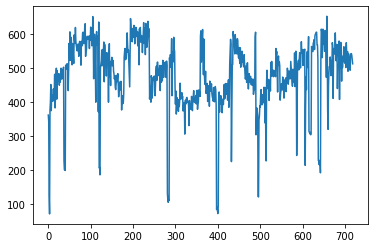

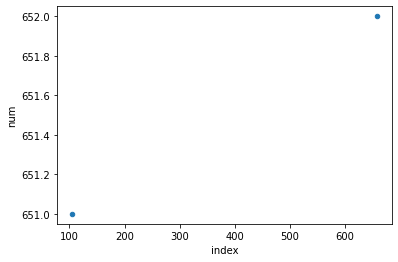

In [104]:
test_data['num'].plot.line()

test_data[test_data['num'] >= np.percentile(train_data['num'], 99)].reset_index().plot.scatter(x=0,y='num')